In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, hinge_loss

In [3]:
df = pd.read_excel(r"Datasets/usefile.xlsx")

In [4]:
df.head(10)

,Gender Index,Age,Hypertension,Heart Disease,Martial Status,Work Type Index,Residence Type,Average Glucose Level,BMI,Smoking Status Index,Stroke
0,0,3.0,0,0,0,0,0,95.12,18.0,0,0
1,0,58.0,1,0,1,2,1,87.96,39.2,0,0
2,1,8.0,0,0,0,2,1,110.89,17.6,0,0
3,1,70.0,0,0,1,2,0,69.04,35.9,1,0
4,1,47.0,0,0,1,2,1,210.95,50.1,0,0
5,0,14.0,0,0,0,1,0,161.28,19.1,0,0
6,1,52.0,0,0,1,2,1,77.59,17.7,1,0
7,1,75.0,0,1,1,3,0,243.53,27.0,0,0
8,1,32.0,0,0,1,2,0,77.67,32.3,2,0
9,1,74.0,1,0,1,3,1,205.84,54.6,0,0


In [5]:
df.describe()

,Gender Index,Age,Hypertension,Heart Disease,Martial Status,Work Type Index,Residence Type,Average Glucose Level,BMI,Smoking Status Index,Stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,0.591866,42.217894,0.093571,0.047512,0.643733,2.119447,0.501290,104.482750,28.574551,0.475046,0.018041
std,0.492009,22.519649,0.291235,0.212733,0.478901,1.102323,0.500004,43.111751,7.639769,0.742823,0.133103
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.540000,23.400000,0.000000,0.000000
50%,1.000000,44.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.580000,27.700000,0.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,112.070000,32.600000,1.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,291.050000,97.600000,2.000000,1.000000


In [6]:
df.isnull().sum()

Gender Index             0
Age                      0
Hypertension             0
Heart Disease            0
Martial Status           0
Work Type Index          0
Residence Type           0
Average Glucose Level    0
BMI                      0
Smoking Status Index     0
Stroke                   0
dtype: int64

<AxesSubplot:>

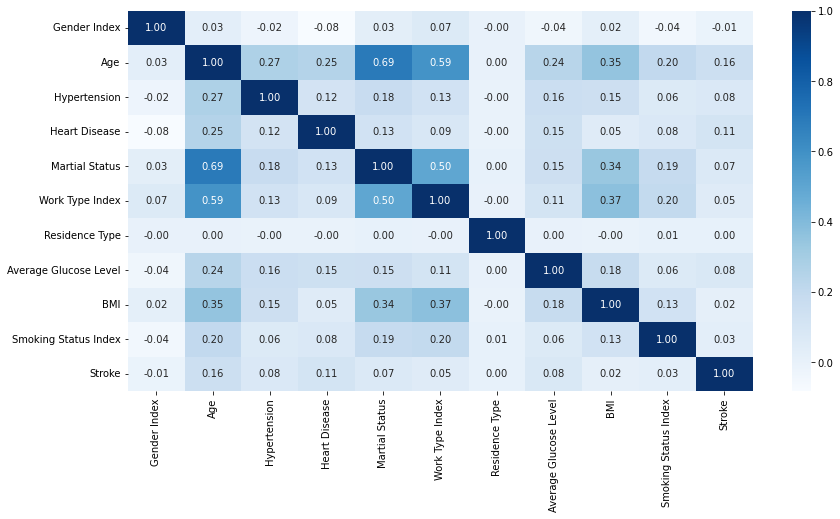

In [7]:
plt.rcParams['figure.figsize'] = (14,7)
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='Blues')

In [8]:
df.shape

(43400, 11)

In [9]:
df['Stroke'].value_counts()

0    42617
1      783
Name: Stroke, dtype: int64

In [10]:
df.dtypes

Gender Index               int64
Age                      float64
Hypertension               int64
Heart Disease              int64
Martial Status             int64
Work Type Index            int64
Residence Type             int64
Average Glucose Level    float64
BMI                      float64
Smoking Status Index       int64
Stroke                     int64
dtype: object

## Split in Train,Test 

In [11]:
X = df.drop('Stroke',axis=1)
X.head(5)

,Gender Index,Age,Hypertension,Heart Disease,Martial Status,Work Type Index,Residence Type,Average Glucose Level,BMI,Smoking Status Index
0,0,3.0,0,0,0,0,0,95.12,18.0,0
1,0,58.0,1,0,1,2,1,87.96,39.2,0
2,1,8.0,0,0,0,2,1,110.89,17.6,0
3,1,70.0,0,0,1,2,0,69.04,35.9,1
4,1,47.0,0,0,1,2,1,210.95,50.1,0


In [12]:
y = df['Stroke']
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Stroke, dtype: int64

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)

In [51]:
X_train.shape

(34720, 10)

In [52]:
X_test.shape

(8680, 10)

In [53]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [54]:
X_train

array([[ 0.82969259,  1.32213599, -0.3222331 , ..., -0.71882026,
        -0.6875417 ,  0.71218423],
       [ 0.82969259, -0.93854822, -0.3222331 , ..., -0.39099967,
        -1.41014335, -0.63806076],
       [-1.20239874,  1.5437717 , -0.3222331 , ..., -0.90813491,
        -0.10946038,  0.71218423],
       ...,
       [ 0.82969259,  1.76540741, -0.3222331 , ..., -1.04803287,
        -0.63498885,  0.71218423],
       [-1.20239874,  0.56857459, -0.3222331 , ..., -0.03255466,
         1.19122259, -0.63806076],
       [ 0.82969259,  1.36646313,  3.10334351, ..., -0.85895022,
         0.56058843,  0.71218423]])

In [55]:
X_test

array([[ 0.82889999,  1.77139637, -0.3175285 , ..., -0.97004291,
         0.39483603, -0.64540635],
       [-1.20526793,  1.1899273 , -0.3175285 , ..., -0.66408654,
         0.70452884, -0.64540635],
       [ 0.82889999, -0.95703543, -0.3175285 , ..., -0.24640975,
         0.4851631 ,  2.01593669],
       ...,
       [-1.20526793, -0.42029475,  3.14932358, ..., -0.45617529,
         0.4851631 , -0.64540635],
       [-1.20526793, -1.00176382, -0.3175285 , ..., -0.88428241,
        -0.572954  , -0.64540635],
       [-1.20526793,  0.29535949,  3.14932358, ..., -0.57577641,
         1.67231888, -0.64540635]])

## SVM  Modelling 

In [19]:
#SVC : Classifier. (datapoints near to the hyperplane its perpendicular distance is found and summed up for all points 
#and maximised known as Support Vector Classifiers)
#Hyperplane seggregates into classes

In [20]:
#Kernel Function is a method used to take data as input and transform it into the required form of processing data

In [21]:
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss
from sklearn.svm import SVC

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
i = 0
accuracy_ = []
log_loss_ = []
roc_auc_scores = []

for k in kernels:
    # Define model parameters, and fit train data
    svm_model = SVC(kernel=k, C=2, probability=True)  # Set probability=True to enable predict_proba()
    svm_model.fit(X_train, y_train)
    i += 1

    # Predict labels for the testing set
    y_pred = svm_model.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_.append(acc)

    # Calculate log loss
    y_pred_prob = svm_model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class
    logloss = log_loss(y_test, y_pred_prob)
    log_loss_.append(logloss)

    # Calculate ROC AUC Scores
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    roc_auc_scores.append(roc_auc)

In [22]:
data_SVM = {
    'Kernel': kernels,
    'Accuracy': accuracy_,
    'Log Loss': log_loss_,
    'ROC_AUC_Score': roc_auc_scores
}


In [23]:
SVM_Results = pd.DataFrame(data_SVM)
SVM_Results

,Kernel,Accuracy,Log Loss,ROC_AUC_Score
0,linear,0.984677,0.078559,0.681071
1,rbf,0.984677,0.079378,0.627406
2,poly,0.984677,0.085575,0.570521
3,sigmoid,0.968433,0.077052,0.593073


In [24]:
SVM_Results.to_csv("SVM Results.csv",index=False)

# ROC AUC for Different SVM Kernels

In [32]:
svm_best = SVC(kernel='linear', C=2, probability=True)  # Set probability=True to enable predict_proba()
svm_best.fit(X_train, y_train)

SVC(C=2, kernel='linear', probability=True)

In [35]:
y_probs = svm_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

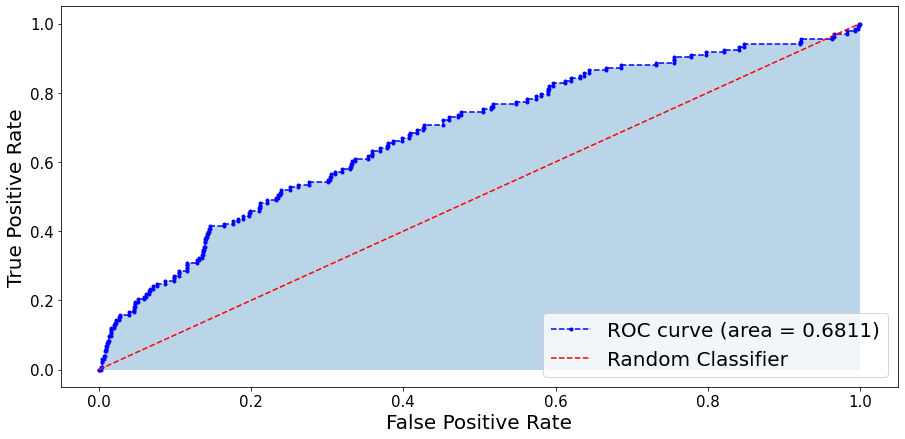

In [40]:
plt.figure(figsize=(15,7))
plt.plot(fpr, tpr, marker = '.',color='blue',linestyle='--', label='ROC curve (area = %0.4f)' % roc_auc )
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.fill_between(fpr, tpr, alpha=0.3)
plt.xlabel('False Positive Rate', fontsize = "20")
plt.ylabel('True Positive Rate', fontsize = "20")
plt.legend(loc="lower right", fontsize="20")
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.show()

# Comparison of Accuracy for Different SVM Kernels

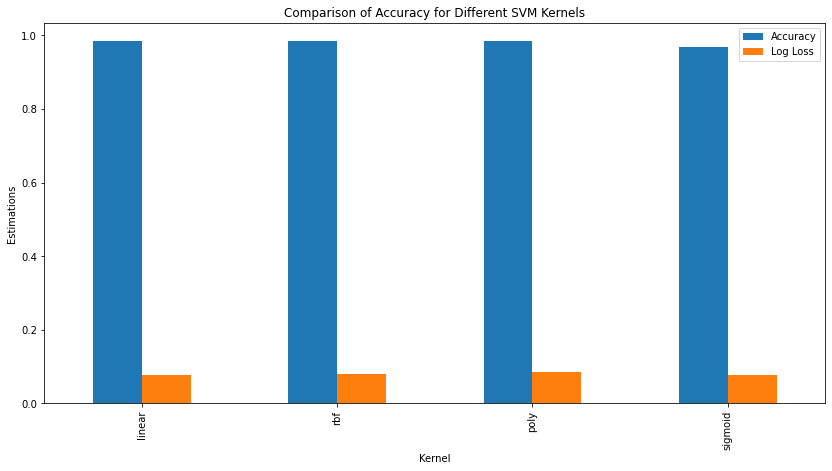

In [28]:
# Plotting the comparison graph for Accuracy
SVM_Results.plot(x="Kernel", y=['Accuracy','Log Loss'], kind="bar")
plt.xlabel('Kernel')
plt.ylabel('Estimations')
plt.title('Comparison of Accuracy for Different SVM Kernels')
plt.legend()
plt.show()

# Comparison of Log Loss for Different SVM Kernels

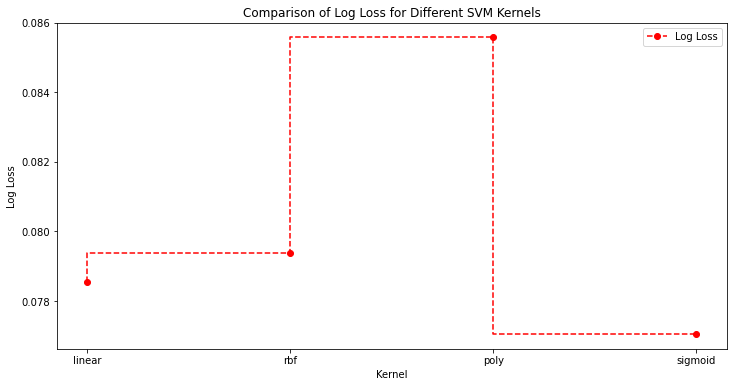

In [29]:
# Plotting the comparison graph for Log Loss
fig, ax = plt.subplots(figsize=(12, 6))
plt.step(kernels, log_loss_, marker='o', label='Log Loss', color='red', linestyle='dashed')
plt.xlabel('Kernel')
plt.ylabel('Log Loss')
plt.title('Comparison of Log Loss for Different SVM Kernels')
plt.legend()
plt.show()

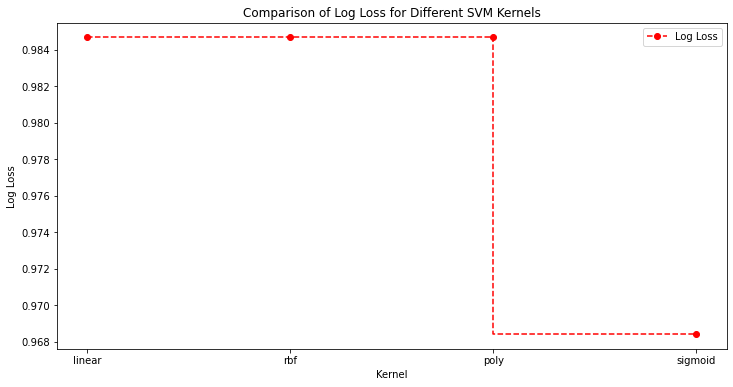

In [41]:
# Plotting the comparison graph for Log Loss
fig, ax = plt.subplots(figsize=(12, 6))
plt.step(kernels, accuracy_, marker='o', label='Log Loss', color='red', linestyle='dashed')
plt.xlabel('Kernel')
plt.ylabel('Log Loss')
plt.title('Comparison of Log Loss for Different SVM Kernels')
plt.legend()
plt.show()

In [29]:
plt.savefig('Comparison_Accuracy.pdf', format='jpg')
plt.savefig('Comparison_Log_Loss.pdf', format='jpg')

<Figure size 432x288 with 0 Axes>

In [56]:
k_degree = list(range(1,21))

In [57]:
k_degree

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [58]:
poly_kernel_acc = []

In [59]:
for k in k_degree:
    svm_pol = SVC(kernel='poly', degree=k, random_state=0)
    scores = cross_val_score(svm_pol, X_train, y_train, cv=5, scoring='accuracy')
    poly_kernel_acc.append(scores.mean())

In [60]:
poly_kernel_acc

[0.981278801843318,
 0.981278801843318,
 0.981278801843318,
 0.9811059907834101,
 0.9797523041474655,
 0.978081797235023,
 0.976094470046083,
 0.9743663594470047,
 0.9726382488479264,
 0.9710541474654377,
 0.9698732718894009,
 0.9700460829493087,
 0.9696716589861751,
 0.9685195852534563,
 0.9678571428571429,
 0.9669930875576037,
 0.966733870967742,
 0.9663594470046084,
 0.965754608294931,
 0.9649769585253456]

In [73]:
for i in range(20):
    poly_kernel_acc[i] *= 100
    poly_kernel_acc[i] = round(poly_kernel_acc[i],4)

In [74]:
poly_kernel_acc

[98.1279,
 98.1279,
 98.1279,
 98.1106,
 97.9752,
 97.8082,
 97.6094,
 97.4366,
 97.2638,
 97.1054,
 96.9873,
 97.0046,
 96.9672,
 96.852,
 96.7857,
 96.6993,
 96.6734,
 96.6359,
 96.5755,
 96.4977]

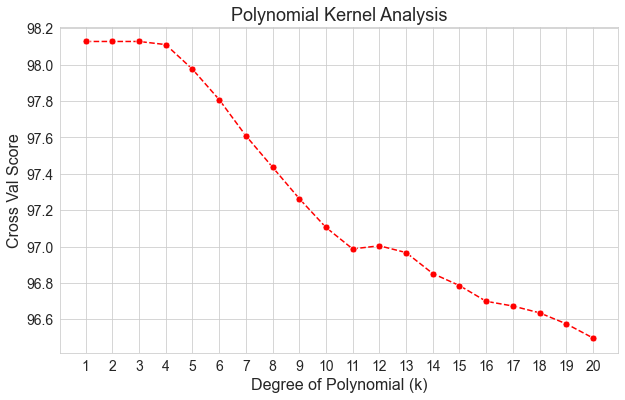

In [103]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_degree, y=poly_kernel_acc, marker='o', markersize=7, color='red', linestyle = '--')
plt.title('Polynomial Kernel Analysis',fontsize=18)
plt.ylabel('Cross Val Score',fontsize=16)
plt.xlabel('Degree of Polynomial (k)',fontsize=16)
plt.xticks(k_degree,fontsize=14)
plt.yticks(fontsize=14)
plt.show()